In [54]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [55]:
df=pd.read_csv("datasets/cleandf.csv")

In [56]:
pd.set_option('display.max_columns', None)

## RANDOM FOREST CLASSIFIER WITH FEATURE SELECTION

Purpose: to predict whether a flight is recommended or not (avoiding multicollinearity) and do a feature selection to check which variables are more important in the model

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [58]:
df.reset_index(drop=True, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90008 entries, 0 to 90007
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           90008 non-null  int64 
 1   AIRLINENAME          90008 non-null  object
 2   CABINTYPE            90008 non-null  int64 
 3   DATEFLOWN            90008 non-null  object
 4   DATEPUB              90008 non-null  object
 5   ENTERTAINMENTRATING  90008 non-null  int64 
 6   FOODRATING           90008 non-null  int64 
 7   GROUNDSERVICERATING  90008 non-null  int64 
 8   ORIGINCOUNTRY        90008 non-null  object
 9   OVERALLSCORE         90008 non-null  int64 
 10  RECOMMENDED          90008 non-null  int64 
 11  REVIEW               90008 non-null  object
 12  ROUTE                90008 non-null  object
 13  ORIGIN               90008 non-null  object
 14  DESTINY              89996 non-null  object
 15  SCALE_YN             90008 non-null  int64 
 16  SEAT

In [60]:
#Check the names of the countries

In [61]:
df["ORIGINCOUNTRY"].replace("UnitedStates","United States", inplace=True)
df["ORIGINCOUNTRY"].replace("UnitedKingdom","United Kingdom", inplace=True)
df["ORIGINCOUNTRY"].replace("CzechRepublic","Czech Republic", inplace=True)
df["ORIGINCOUNTRY"].replace("RussianFederation","Russian Federation", inplace=True)
df["ORIGINCOUNTRY"].replace("UnitedArabEmirates","United Arab Emirates", inplace=True)
df["ORIGINCOUNTRY"].replace("NetherlandsAntilles","Netherlands Antilles", inplace=True)
df["ORIGINCOUNTRY"].replace("SouthAfrica","South Africa", inplace=True)
df["ORIGINCOUNTRY"].replace("SaudiArabia","Saudi Arabia", inplace=True)
df["ORIGINCOUNTRY"].replace("HongKong","China", inplace=True)
df["ORIGINCOUNTRY"].replace("NewZealand","New Zealand", inplace=True)
df["ORIGINCOUNTRY"].replace("SouthKorea","South Korea", inplace=True)
df["ORIGINCOUNTRY"].replace("CostaRica","Costa Rica", inplace=True)
df["ORIGINCOUNTRY"].replace("AntiguaandBarbuda","Antigua and Barbuda", inplace=True)
df["ORIGINCOUNTRY"].replace("TurksandCaicosIslands","Turks and Caicos Islands", inplace=True)
df["ORIGINCOUNTRY"].replace("SriLanka","Sri Lanka", inplace=True)
df["ORIGINCOUNTRY"].replace("CaymanIslands","Cayman Islands", inplace=True)
df["ORIGINCOUNTRY"].replace("PuertoRico","Puerto Rico", inplace=True)
df["ORIGINCOUNTRY"].replace("ElSalvador","El Salvador", inplace=True)

In [62]:
#FUNCION PARA DEVOLVER CONTINENTES CUANDO LE DAMOS PAISES EN UN DF

def continente(pais):
    asia=['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'China','Vietnam', 'Taiwan','Korea', 'Japan', 'Mongolia', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka','Brunei', 'Darussalam', 'Cambodia', 'Indonesia', 'Lao', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam', 'Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'Palestine', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
    europe= ['Albania' ,'Andorra' ,'Austria' ,'Belarus' ,'Belgium' ,'Czech Republic ','Bosnia Herzegovina' ,'Bulgaria' ,'Croatia' ,'Cyprus' ,'Czech' ,'Denmark' ,'Estonia' ,'Finland' ,'France' ,'Germany' ,'Greece' ,'Hungary' ,'Iceland' ,'Ireland' ,'Italy' ,'Latvia' ,'Liechtenstein' ,'Lithuania' ,'Luxembourg' ,'Malta' ,'Moldova' ,'Monaco' ,'Montenegro' ,'Netherlands' ,'North' ,'Macedonia' ,'Norway' ,'Poland' ,'Portugal' ,'Romania' ,'Russia' ,'San Marino' ,'Serbia' ,'Slovakia' ,'Slovenia' ,'Spain' ,'Sweden' ,'Switzerland' ,'Ukraine' ,'United Kingdom']
    africa=['Lesotho', 'Swaziland', 'Botswana', 'Namibia', 'South Africa', 'Angola', 'Cameroon', 'Equatorial Guinea', 'Gabon', 'Congo', 'Chad', 'Central African Republic', 'Congo', 'Sao Tome and Principe', 'Burundi', 'Eritrea', 'Madagascar', 'Reunion', 'Somalia', 'Comoros', 'Ethiopia', 'Rwanda', 'Djibouti', 'Kenya', 'Mayotte', 'Seychelles', 'Uganda', 'Mozambique', 'Zambia', 'Malawi', 'Tanzania', 'Zimbabwe', 'Benin', 'Liberia', 'Saint Helena', 'Burkina Faso', 'Gambia', 'Mali', 'Ghana', 'Mauritania', 'Senegal', 'Cape Verde', 'Cote Divoire', 'Guinea', 'Niger', 'Sierra Leone', 'Guinea-Bissau', 'Nigeria', 'Togo', 'Algeria', 'Egypt', 'Libyan ', 'Morocco', 'Tunisia', 'Sahara', 'Sudan']
    america=['Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Bahamas', 'Bajo Nuevo Bank', 'Barbados', 'Belize', 'Bermuda', 'Bolivia', 'Bonaire', 'Brazil', 'British Virgin Islands', 'Canada', ' Cayman Islands', 'Chile', ' Clipperton Island', 'Colombia', ' Costa Rica', 'Cuba', 'Curaçao', 'Dominica', ' Dominican Republic', 'Ecuador', ' El Salvador', ' Falkland Islands', ' Federal Dependencies of Venezuela', ' French Guiana', 'Greenland', 'Grenada', 'Guadeloupe ', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Montserrat', 'Navassa Island', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', ' Puerto Rico', 'Saba', ' Saint Barthélemy', 'Saint Kitts and Nevis', ' Saint Lucia', ' Saint Martin', ' Saint Pierre and Miquelon', ' Saint Vincent and the Grenadines', 'Serranilla Bank', ' Sint Eustatius', ' Sint Maarten', 'South Georgia', 'South Sandwich Islands', 'Suriname', ' Trinidad and Tobago', 'Turks and Caicos Islands', 'United States of America', 'United States', 'USA', 'U.S.A.', ' U.S. Virgin Islands', 'Uruguay', 'Venezuela']
    oceania=['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

    if pais in asia:
        return "Asia"
    elif pais in europe:
        return "Europe"
    elif pais in africa:
        return "Africa"
    elif pais in america:
        return "America"
    elif pais in oceania:
        return "Oceania"
    else:
        return "Other"

In [63]:
df['CONTINENT'] = df['ORIGINCOUNTRY'].apply(lambda x: continente(x))

In [64]:
df.CONTINENT.value_counts()

CONTINENT
America    40253
Europe     26370
Asia       13075
Oceania     7757
Africa      1307
Other       1246
Name: count, dtype: int64

In [65]:
df.sample()

,Unnamed: 0,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR,CONTINENT
32191,32303,Emirates,3,2017-04-01,24th April 2017,4,3,4,Thailand,4,0,Dubai to Bangkok. Used to be a very frequent f...,Dubai to Bangkok,Dubai,Bangkok,0,5,2,emirates,standards have deteriorated,1,1,0,3,0,102e9b99-4afe-45fc-b2ed-0d91258aca23,1,2017,Asia


In [78]:
categorical=df["CONTINENT"]
categorical=pd.DataFrame(categorical)
numerical=df[["CABINTYPE","TRAVELLER", "PURPOSE", "RECOMMENDED","FOODRATING", "GROUNDSERVICERATING", "SERVICERATING","TRIPVERIFIED", "SCALE_YN", "LONGDISTANCE", "SEATCOMFORTRATING", "VALUERATING"]]
#OVERALL not included as it is too related to whether it is recommended or not a flight

In [79]:
encoder = OneHotEncoder(drop='first').fit(categorical) #it will take out Africa, which is not a big category --> ok
encoded_categorical = encoder.transform(categorical).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

In [80]:
data = pd.concat([numerical, encoded_categorical], axis = 1)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90008 entries, 0 to 90007
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CABINTYPE            90008 non-null  int64  
 1   TRAVELLER            90008 non-null  int64  
 2   PURPOSE              90008 non-null  int64  
 3   RECOMMENDED          90008 non-null  int64  
 4   FOODRATING           90008 non-null  int64  
 5   GROUNDSERVICERATING  90008 non-null  int64  
 6   SERVICERATING        90008 non-null  int64  
 7   TRIPVERIFIED         90008 non-null  int64  
 8   SCALE_YN             90008 non-null  int64  
 9   LONGDISTANCE         90008 non-null  int64  
 10  SEATCOMFORTRATING    90008 non-null  int64  
 11  VALUERATING          90008 non-null  int64  
 12  CONTINENT_America    90008 non-null  float64
 13  CONTINENT_Asia       90008 non-null  float64
 14  CONTINENT_Europe     90008 non-null  float64
 15  CONTINENT_Oceania    90008 non-null 

In [82]:
data

,CABINTYPE,TRAVELLER,PURPOSE,RECOMMENDED,FOODRATING,GROUNDSERVICERATING,SERVICERATING,TRIPVERIFIED,SCALE_YN,LONGDISTANCE,SEATCOMFORTRATING,VALUERATING,CONTINENT_America,CONTINENT_Asia,CONTINENT_Europe,CONTINENT_Oceania,CONTINENT_Other
0,1,1,1,1,4,4,5,1,0,0,4,3,0.0,0.0,1.0,0.0,0.0
1,1,1,1,0,1,1,2,1,0,0,2,2,0.0,0.0,1.0,0.0,0.0
2,1,1,1,0,1,1,1,1,0,0,2,2,0.0,0.0,1.0,0.0,0.0
3,1,1,0,0,1,1,3,1,0,0,1,1,0.0,0.0,1.0,0.0,0.0
4,1,1,1,1,0,5,4,1,0,0,4,4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90003,1,1,1,1,0,2,1,0,0,0,1,5,0.0,0.0,1.0,0.0,0.0
90004,1,3,1,0,1,1,2,0,0,1,1,1,1.0,0.0,0.0,0.0,0.0
90005,1,1,1,0,0,2,1,0,0,0,2,2,0.0,0.0,1.0,0.0,0.0
90006,1,2,1,0,0,1,2,0,0,0,2,1,1.0,0.0,0.0,0.0,0.0


In [83]:
y = data['RECOMMENDED']
X = data.drop(columns=['RECOMMENDED'])

In [84]:
X

,CABINTYPE,TRAVELLER,PURPOSE,FOODRATING,GROUNDSERVICERATING,SERVICERATING,TRIPVERIFIED,SCALE_YN,LONGDISTANCE,SEATCOMFORTRATING,VALUERATING,CONTINENT_America,CONTINENT_Asia,CONTINENT_Europe,CONTINENT_Oceania,CONTINENT_Other
0,1,1,1,4,4,5,1,0,0,4,3,0.0,0.0,1.0,0.0,0.0
1,1,1,1,1,1,2,1,0,0,2,2,0.0,0.0,1.0,0.0,0.0
2,1,1,1,1,1,1,1,0,0,2,2,0.0,0.0,1.0,0.0,0.0
3,1,1,0,1,1,3,1,0,0,1,1,0.0,0.0,1.0,0.0,0.0
4,1,1,1,0,5,4,1,0,0,4,4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90003,1,1,1,0,2,1,0,0,0,1,5,0.0,0.0,1.0,0.0,0.0
90004,1,3,1,1,1,2,0,0,1,1,1,1.0,0.0,0.0,0.0,0.0
90005,1,1,1,0,2,1,0,0,0,2,2,0.0,0.0,1.0,0.0,0.0
90006,1,2,1,0,1,2,0,0,0,2,1,1.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150], #nº árboles. Primero son 50 y luego 100.
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt','log2']

    }
clf = RandomForestClassifier(random_state=100)

In [87]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1) 

In [88]:
X_train.columns = X_train.columns.astype(str)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [89]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [90]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=42, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=7)
print(np.mean(cross_val_scores))

0.9513929879684521


In [91]:
clf.fit( X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=42)

In [92]:
X_train.head()

,CABINTYPE,TRAVELLER,PURPOSE,FOODRATING,GROUNDSERVICERATING,SERVICERATING,TRIPVERIFIED,SCALE_YN,LONGDISTANCE,SEATCOMFORTRATING,VALUERATING,CONTINENT_America,CONTINENT_Asia,CONTINENT_Europe,CONTINENT_Oceania,CONTINENT_Other
10963,1,3,1,1,1,1,1,0,1,1,1,1.0,0.0,0.0,0.0,0.0
65100,1,1,0,3,4,5,0,0,1,4,4,0.0,1.0,0.0,0.0,0.0
19065,1,1,0,1,2,3,1,0,0,1,2,0.0,0.0,1.0,0.0,0.0
4293,3,2,1,3,3,3,1,0,1,1,1,1.0,0.0,0.0,0.0,0.0
76428,3,1,1,4,4,4,1,1,1,5,4,0.0,0.0,1.0,0.0,0.0


In [93]:
def importancia (model, X_train):
    import pandas as pd
    feature_names = X_train.columns
    feature_names = list(feature_names)
    featimp = pd.DataFrame(list(zip(feature_names, model.feature_importances_)))
    featimp.columns = ['columns_name', 'score_feature_importance']
    df_importante=featimp[featimp.score_feature_importance>0]
    return df_importante.sort_values(by=['score_feature_importance'], ascending = False)


In [94]:
#X_train.columns = X_train.columns 

In [95]:
importancia (clf,X_train)

,columns_name,score_feature_importance
10,VALUERATING,0.399880
4,GROUNDSERVICERATING,0.190354
5,SERVICERATING,0.160052
9,SEATCOMFORTRATING,0.123803
3,FOODRATING,0.069864
1,TRAVELLER,0.008774
11,CONTINENT_America,0.008773
0,CABINTYPE,0.006766
6,TRIPVERIFIED,0.006295
8,LONGDISTANCE,0.005842


[Text(0.5, 0, 'VARS'),
 Text(0, 0.5, 'FEAT.IMPORTANCE'),
 Text(0.5, 1.0, 'VAR. LEVEL OF IMPORTANCE TO PREDICT TRIP VERIFICATION')]

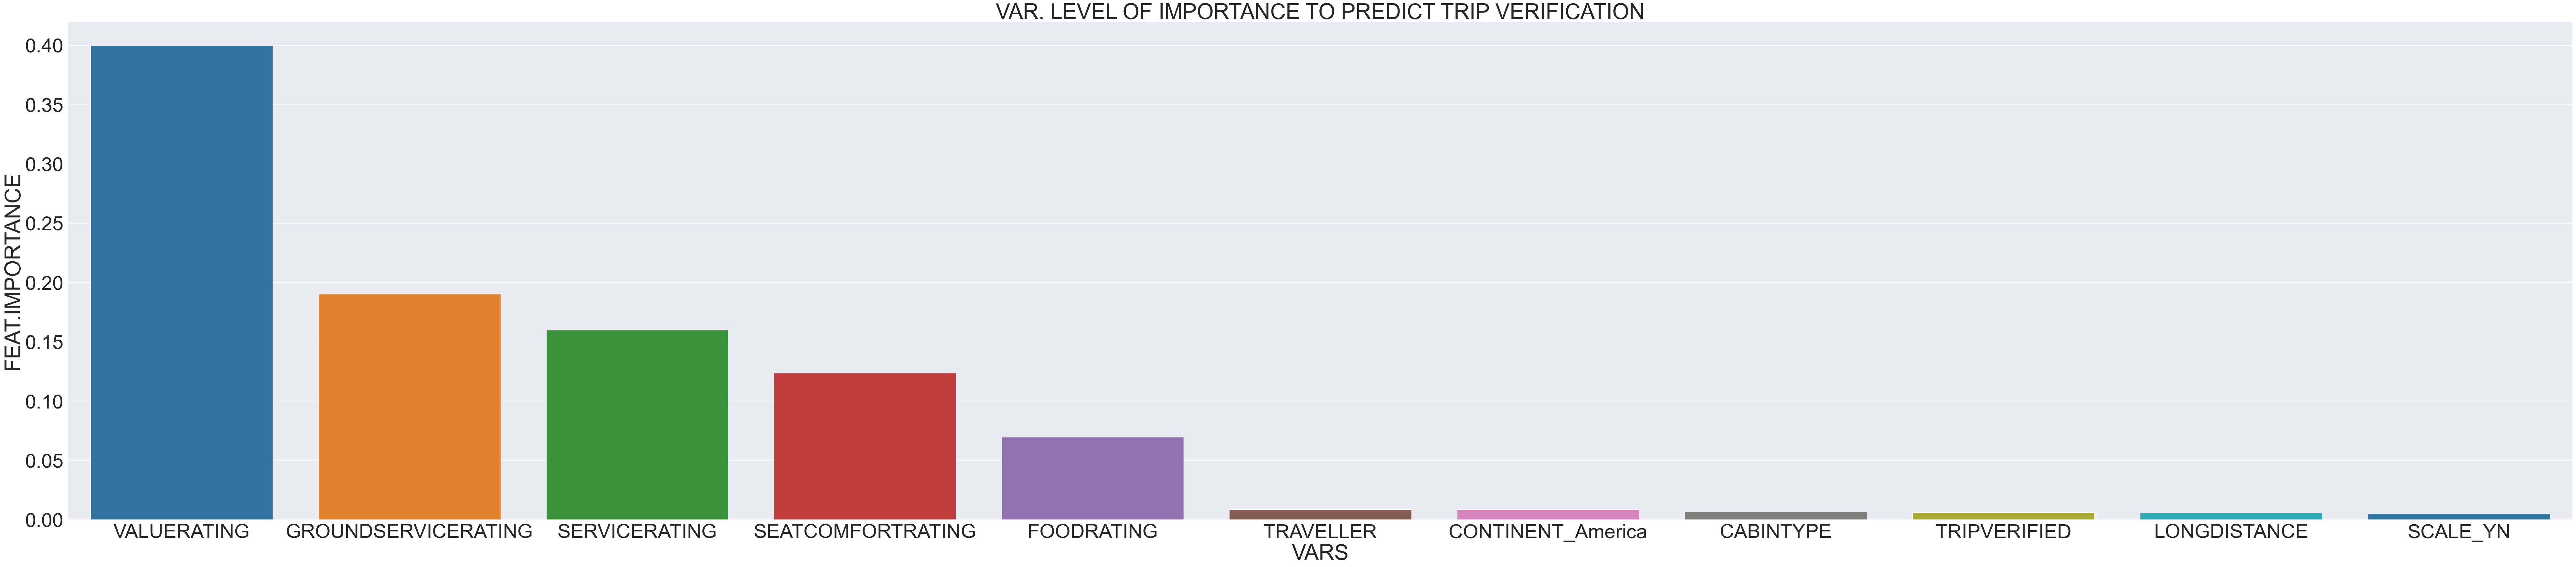

In [99]:
#Feature Importance Graphically

feature_names = X_train.columns
feature_names = list(feature_names)

df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']

grapfh_featimp=df[df.score_feature_importance>0.005].sort_values(by=['score_feature_importance'], ascending = False)
a=sns.barplot(grapfh_featimp, x="columns_name", y="score_feature_importance", palette="tab10")
sns.set(rc = {'figure.figsize':(100,20)})

sns.set(font_scale=4)

a.set(xlabel ="VARS", ylabel = "FEAT.IMPORTANCE", title ='VAR. LEVEL OF IMPORTANCE TO PREDICT TRIP VERIFICATION')
